In [2]:
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        accuracy_list.append(1)
    else:
        accuracy_list.append(0)

print(accuracy_list)

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1187345789.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


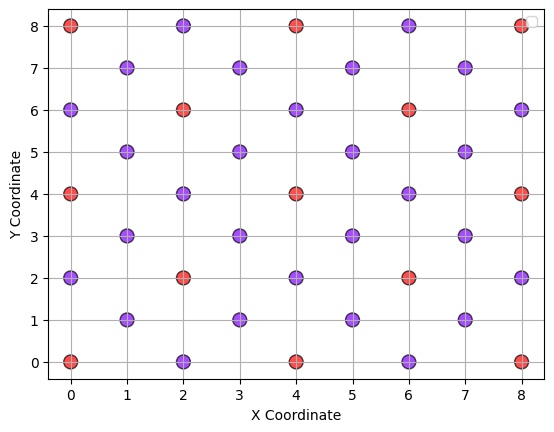

In [3]:

# visualize the nodes
import matplotlib.pyplot as plt
import numpy as np
# Extract x and y coordinates
truth_x, truth_y = zip(*truth_location_list)
estimate_x, estimate_y = zip(*estimate_location_list)

# Plot
plt.figure(facecolor='white')
scatter = plt.scatter(truth_x, truth_y, c=accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7)
# plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')

# plt.colorbar(scatter, label='Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
# plt.title('Estimated vs True Locations with Accuracy as Color')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1392067828.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


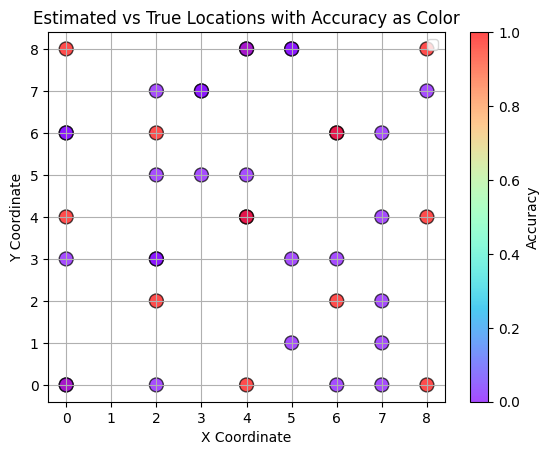

In [4]:
# visualize the nodes
import matplotlib.pyplot as plt
import numpy as np
# Extract x and y coordinates
truth_x, truth_y = zip(*truth_location_list)
estimate_x, estimate_y = zip(*estimate_location_list)

# Plot
# plt.figure(figsize=(10, 8))
scatter = plt.scatter(estimate_x, estimate_y, c=accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7)
# plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')

plt.colorbar(scatter, label='Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Estimated vs True Locations with Accuracy as Color')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import scipy.optimize as opt
# Multilateration function using least squares
def multilaterate(neighbors):
    def error_function(x, neighbors):
        return sum((np.linalg.norm(x - np.array(neighbor[0])) - neighbor[1])**2 for neighbor in neighbors)
    
    if len(neighbors) < 3:
        return None  # Not enough neighbors to perform multilateration
    
    initial_guess = np.mean([neighbor[0] for neighbor in neighbors], axis=0)
    result = opt.minimize(error_function, initial_guess, args=(neighbors,))
    
    if result.success:
        return result.x
    else:
        return None

1. use absolute distance for estimation and set accuracy to 1 with any calculation

In [6]:
import imageio
import copy
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)

estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# plt.colorbar(scatter, label='Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_1.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

while np.average(estimated_accuracy_list) < 1:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] == 1:
                    neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # calculate the location with multilateration

        new_location = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            estimated_accuracy_list[idx] = 1

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop

    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    # plt.colorbar(scatter, label='Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_1.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

# Create GIF
imageio.mimsave('location_estimation_distributed_1.gif', frames, duration=1000, loop=0)


print(estimate_location_list)
print(estimated_accuracy_list)

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1296992005.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1296992005.py:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1296992005.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1296992005.py:108: Depre

[[0, 0], [-3.559143819600744e-08, 2.0000000867873364], [0, 4], [-3.559143819595323e-08, 6.000000086787337], [0, 8], [1.000000014367882, 1.0000000127989925], [0.9999999911021404, 3.000000021696834], [0.9999999911021404, 5.0000000216968346], [1.0000000059267502, 7.000000026865965], [2.0000000930629662, -3.5591365820904566e-08], [2, 2], [2.0, 4.0], [2, 6], [2.0000000592984386, 8.00000002067652], [3.0000000232657413, 0.9999999911021585], [3.0, 3.0], [3.0, 5.0], [3.0000000148246095, 7.00000000516913], [4, 0], [4.0, 2.0], [4, 4], [4.0, 6.0], [4, 8], [5.000000023277161, 0.9999999911021789], [5.0, 3.0], [5.0, 5.0], [5.000000014829061, 7.0000000051726285], [6.0000000931086435, -3.559128468013555e-08], [6, 2], [6.0, 4.0], [6, 6], [6.000000059316241, 8.000000020690512], [7.000000028446291, 1.0000000059267884], [7.00000000516913, 3.0000000148246095], [7.0000000051726285, 5.000000014829061], [7.000000020001688, 7.000000020001688], [8, 0], [8.00000002067652, 2.0000000592984386], [8, 4], [8.000000020

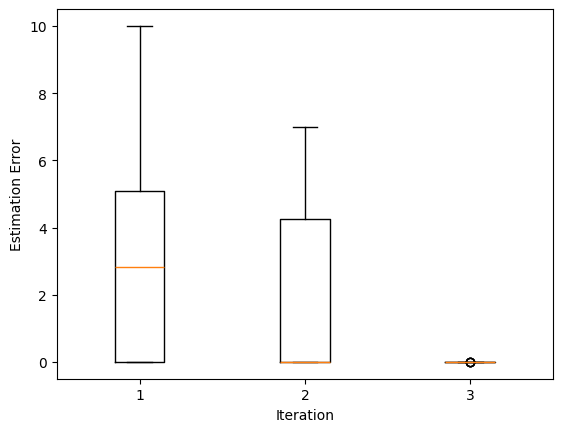

In [7]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.show()

2. use absolute distance for estimation and set accuracy to 1 with any calculation

In [8]:
# Multilateration function using least squares
def multilaterate(neighbors):
    def error_function(x, neighbors):
        return sum((np.linalg.norm(x - np.array(neighbor[0])) - neighbor[1])**2 for neighbor in neighbors)
    
    if len(neighbors) < 3:
        return None, None  # Not enough neighbors to perform multilateration
    
    initial_guess = np.mean([neighbor[0] for neighbor in neighbors], axis=0)
    result = opt.minimize(error_function, initial_guess, args=(neighbors,))
    
    if result.success:
        estimation_accuracy = 1 - np.sqrt(result.fun / len(neighbors))/np.mean([neighbor[1] for neighbor in neighbors])  # Root Mean Squared Error / Average Distance
        return result.x, estimation_accuracy
    else:
        return None, None

In [9]:
import imageio
import copy

# prepare the lists
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)

# dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_2.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 0.00001
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.9:
                    neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_2.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_distributed_2.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/72084046.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/72084046.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/72084046.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/72084046.py:121: DeprecationWa

[[0, 0], [-3.559143819600744e-08, 2.0000000867873364], [0, 4], [-3.559143819595323e-08, 6.000000086787337], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [2.0000000930629662, -3.5591365820904566e-08], [2, 2], [2.0, 4.0], [2, 6], [2.0000000592984386, 8.00000002067652], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4.0, 2.0], [4, 4], [4.0, 6.0], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [6.0000000931086435, -3.559128468013555e-08], [6, 2], [6.0, 4.0], [6, 6], [6.000000059316241, 8.000000020690512], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [8.00000002067652, 2.0000000592984386], [8, 4], [8.000000020690512, 6.000000059316241], [8, 8]]
[1, np.float64(0.9999999631095834), 1, np.float64(0.9999999631095831), 1, 0, 0, 0, 0, np.float64(0.9999999606424754), 1, np.float64(1.0), 1, np.float64(0.9999999750665417), 0, 0, 0, 0, 1, np.float64(1.0), 1, np.float64(1.0), 1, 0, 0, 0, 0, np.float64(0.9999999606244803), 1, np.float64(1.0), 1, np.float64(0.9999999750585182), 0, 0, 0, 0, 1, np.float64(0.9999999750665417), 1

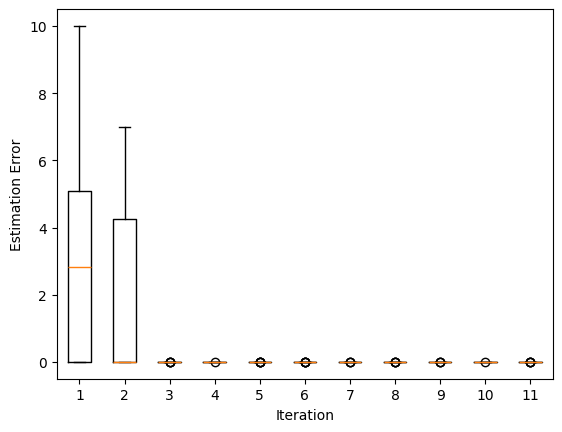

In [10]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.show()

In [11]:
np.median(estimation_error, axis=1)

array([2.82842712e+00, 6.28212840e-08, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

added noise

In [12]:
import imageio
import copy

# prepare the lists
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
# dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_3.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.3  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev)  # Add noise to the distance
                    neighbor_list.append([estimate_location_list[i], noisy_distance])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_3.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_distributed_3.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/4170694551.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/4170694551.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/4170694551.py:118: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/4170694551.py:124: Depre

[[0, 0], [0.22770006498181022, 1.8748733743783204], [0, 4], [0.34695878905065225, 5.881210686480349], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [2.0583916615076907, 0.3575004950925896], [2, 2], [1.5369264823687834, 4.019567513231539], [2, 6], [1.7654158553268913, 7.7345272935844305], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [3.8218398881788005, 2.0737637434364755], [4, 4], [4.272873965768029, 6.0669758250921815], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [6.231161221478398, -0.20480764591128833], [6, 2], [5.789977735068191, 3.856568940576078], [6, 6], [6.013675988347529, 7.894820780802085], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [7.217138455779399, 2.0628161540368617], [8, 4], [8.303750715232935, 5.919495582826089], [8, 8]]
[1, np.float64(0.9443776580747929), 1, np.float64(0.9376356302827416), 1, 0, 0, 0, 0, np.float64(0.9886144750432356), 1, np.float64(0.8371154433401463), 1, np.float64(0.9430733875202144), 0, 0, 0, 0, 1, np.float64(0.9700309644421413), 1, np.float64(0.9176067309386023), 

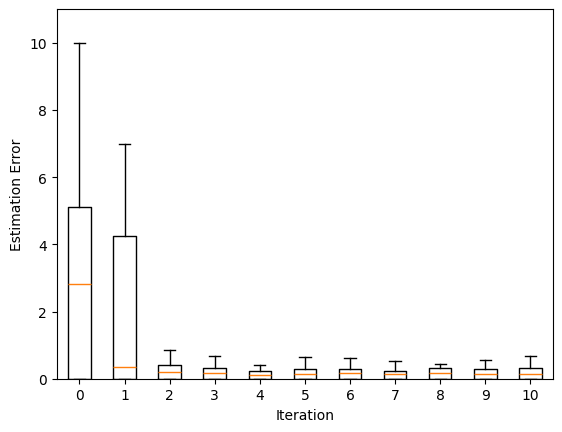

In [13]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 11)
plt.show()

In [14]:
np.median(estimation_error, axis=1)

array([2.82842712, 0.35426752, 0.20361116, 0.1786686 , 0.11818905,
       0.13526249, 0.18012391, 0.14438014, 0.1646074 , 0.14001974,
       0.1531275 ])

added distance squared noise

In [15]:
import imageio
import copy

# prepare the lists
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
# dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_3.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.3  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev* (distance**2))  # Add noise to the distance
                    neighbor_list.append([estimate_location_list[i], noisy_distance])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_3.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_distributed_4.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2178346073.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2178346073.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2178346073.py:118: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2178346073.py:124: Depre

[[0, 0], [2.5071450348751445, 3.235545057908366], [0, 4], [-0.14966771243698204, 6.021869872601442], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [1.491814803303551, 1.3689504116145048], [2, 2], [1.8372438637223485, 3.6149090571541476], [2, 6], [0.4093263703022233, 8.916882883210052], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [3.024580589165309, 3.8082913744332263], [4, 4], [3.2591842631822012, 5.959935276692179], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [7.596751290392568, 3.9872259655389928], [6, 2], [5.638553771495302, 3.3800637196823375], [6, 6], [7.141937984835696, 9.182926064773069], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [9.146247034455904, 1.7343092869603358], [8, 4], [7.9633695984408845, 6.690471523020799], [8, 8]]
[1, np.float64(0.8450339966066548), 1, np.float64(0.5837979487642397), 1, 0, 0, 0, 0, 0, 1, np.float64(0.5767116385159681), 1, np.float64(0.9625903011663829), 0, 0, 0, 0, 1, np.float64(0.8482490550450843), 1, np.float64(0.4852150566541674), 1, 0, 0, 0, 0, np.float64(0.9943

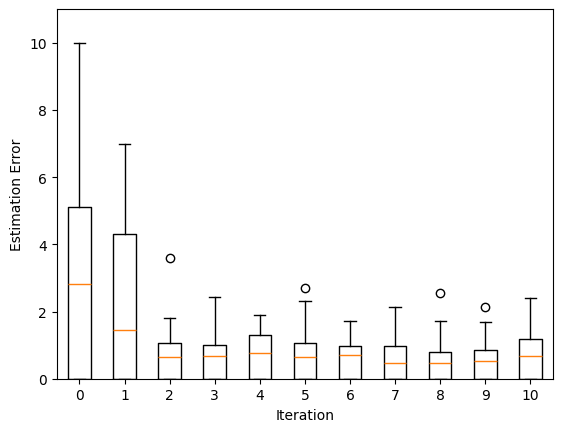

In [16]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 11)
plt.show()

In [17]:
np.median(estimation_error, axis=1)

array([2.82842712, 1.46023198, 0.63343224, 0.66187234, 0.76546984,
       0.6462947 , 0.69164402, 0.4604323 , 0.46646378, 0.52651369,
       0.66838659])

use history for neighbor info

In [18]:
import imageio
import copy

# prepare the lists
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
# dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_5.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.3  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

# Initialize history data structure
neighbor_history = {i: {} for i in range(len(truth_location_list))}

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev* (distance**2))  # Add noise to the distance

                    # Update history data
                    if i not in neighbor_history[idx]:
                        neighbor_history[idx][i] = []
                    neighbor_history[idx][i].append(noisy_distance)

                    # Use history data to mitigate noise
                    if len(neighbor_history[idx][i]) > 1:
                        avg_noisy_distance = np.mean(neighbor_history[idx][i])
                        neighbor_list.append([estimate_location_list[i], avg_noisy_distance])
                    else:
                        neighbor_list.append([estimate_location_list[i], noisy_distance])

                    # neighbor_list.append([estimate_location_list[i], noisy_distance])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_5.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_distributed_5.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1474352863.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1474352863.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1474352863.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/1474352863.py:140: Depre

[[0, 0], [1.561192841440529, 4.038975162064498], [0, 4], [1.3644856823356257, 5.0099936283192505], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [2.2263846984193187, 0.4936861296227988], [2, 2], [1.7474029850144661, 3.9981274762479586], [2, 6], [1.7283242612096419, 9.305598654361637], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [3.9639809032188933, 3.2461192960069782], [4, 4], [5.4679302966858385, 5.747001823574592], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4.637777572080086, 0.6791540071976796], [6, 2], [5.418699696293071, 3.665454622959033], [6, 6], [5.636621949784764, 8.874786751155051], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6.671797637442698, 2.087509262050053], [8, 4], [7.185055825145355, 6.186464930904755], [8, 8]]
[1, np.float64(0.880383843550822), 1, np.float64(0.9370401890259137), 1, 0, 0, 0, 0, np.float64(0.86774441617231), 1, 0, 1, np.float64(0.9289620220286765), 0, 0, 0, 0, 1, np.float64(0.48570260623625705), 1, np.float64(0.7963388391048226), 1, 0, 0, 0, 0, np.float64(0.981339775

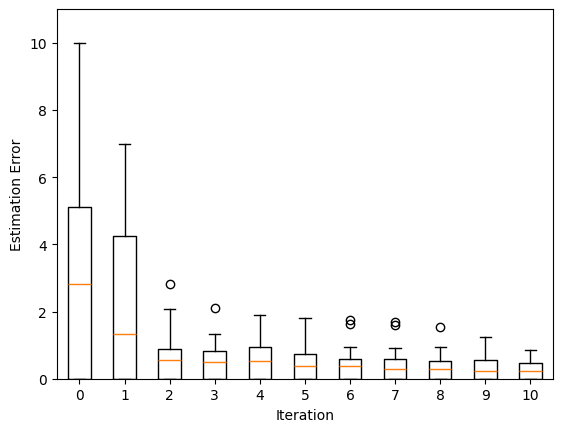

In [19]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))

plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 11)
plt.show()

In [20]:
np.median(estimation_error, axis=1)

array([2.82842712, 1.33356498, 0.55023417, 0.50705364, 0.51861107,
       0.36398929, 0.39194498, 0.29407871, 0.2787537 , 0.22920653,
       0.22303157])

use accuracy as weight

In [21]:
def multilaterate(neighbors):
    def error_function(x, neighbors):
        return sum(neighbor[2] * (np.linalg.norm(x - np.array(neighbor[0])) - neighbor[1])**2 for neighbor in neighbors)
    
    if len(neighbors) < 3:
        return None, None  # Not enough neighbors to perform multilateration
    
    initial_guess = np.mean([neighbor[0] for neighbor in neighbors], axis=0)
    result = opt.minimize(error_function, initial_guess, args=(neighbors,))
    
    if result.success:
        estimation_accuracy = 1 - np.sqrt(result.fun / len(neighbors)) / np.mean([neighbor[1] for neighbor in neighbors])  # Root Mean Squared Error / Average Distance
        return result.x, estimation_accuracy
    else:
        return None, None


In [22]:
import imageio
import copy

# prepare the lists
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
# dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_6.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.3  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

# Initialize history data structure
neighbor_history = {i: {} for i in range(len(truth_location_list))}

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev* (distance**2))  # Add noise to the distance

                    # # Update history data
                    # if i not in neighbor_history[idx]:
                    #     neighbor_history[idx][i] = []
                    # neighbor_history[idx][i].append(noisy_distance)

                    # # Use history data to mitigate noise
                    # if len(neighbor_history[idx][i]) > 1:
                    #     avg_noisy_distance = np.mean(neighbor_history[idx][i])
                    #     neighbor_list.append((estimate_location_list[i], avg_noisy_distance, estimated_accuracy_list_old[i]))
                    # else:
                    #     neighbor_list.append((estimate_location_list[i], noisy_distance, estimated_accuracy_list_old[i]))

                    neighbor_list.append([estimate_location_list[i], noisy_distance, estimated_accuracy_list_old[i]])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_6.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_distributed_6.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2691515196.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2691515196.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2691515196.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2691515196.py:140: Depre

[[0, 0], [1.8350117903738599, 0.15317724018715287], [0, 4], [1.3337408784884375, 5.115154715648171], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [3.872729261575662, 1.425201466996385], [2, 2], [1.6933381088135733, 4.227432238526592], [2, 6], [1.3509548605709223, 9.133119269413987], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [3.291445833930893, 1.5814306583690547], [4, 4], [3.679315387992202, 5.0232811043810095], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [6.197683199316028, 0.5349300863814427], [6, 2], [6.172176576975565, 4.578121332151387], [6, 6], [7.441560081919819, 7.786737679931969], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [7.071516459933872, 1.4484710544864934], [8, 4], [5.219072624837247, 5.601771322702732], [8, 8]]
[1, np.float64(0.7669915552912439), 1, np.float64(0.8840918197934804), 1, 0, 0, 0, 0, np.float64(0.9447913249051342), 1, np.float64(0.4881115165924358), 1, np.float64(0.9864215171953904), 0, 0, 0, 0, 1, np.float64(0.8361149257766277), 1, np.float64(0.7482135737739626), 1, 0, 0

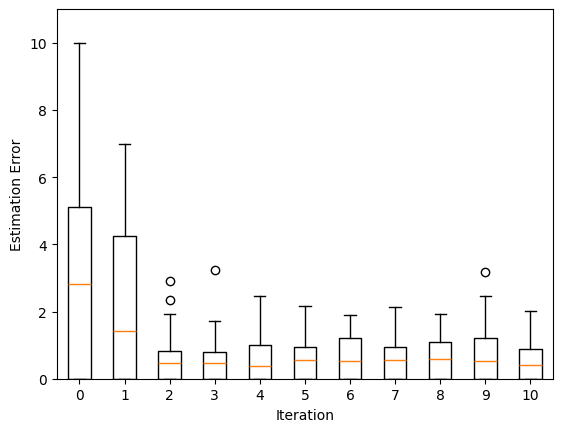

In [23]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 11)
plt.show()

In [24]:
np.median(estimation_error, axis=1)

array([2.82842712, 1.41421356, 0.45419572, 0.468685  , 0.36710526,
       0.54409502, 0.5370833 , 0.55052513, 0.57610058, 0.53715456,
       0.40180216])

weight ** 2

In [29]:
def multilaterate(neighbors):
    def error_function(x, neighbors):
        return sum((neighbor[2]**10) * (np.linalg.norm(x - np.array(neighbor[0])) - neighbor[1])**2 for neighbor in neighbors)
    
    if len(neighbors) < 3:
        return None, None  # Not enough neighbors to perform multilateration
    
    initial_guess = np.mean([neighbor[0] for neighbor in neighbors], axis=0)
    result = opt.minimize(error_function, initial_guess, args=(neighbors,))
    
    if result.success:
        estimation_accuracy = 1 - np.sqrt(result.fun / len(neighbors)) / np.mean([neighbor[1] for neighbor in neighbors])  # Root Mean Squared Error / Average Distance
        return result.x, estimation_accuracy
    else:
        return None, None


In [30]:
import imageio
import copy

# prepare the lists
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
# dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_6.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.3  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

# Initialize history data structure
neighbor_history = {i: {} for i in range(len(truth_location_list))}

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev* (distance**2))  # Add noise to the distance

                    # # Update history data
                    # if i not in neighbor_history[idx]:
                    #     neighbor_history[idx][i] = []
                    # neighbor_history[idx][i].append(noisy_distance)

                    # # Use history data to mitigate noise
                    # if len(neighbor_history[idx][i]) > 1:
                    #     avg_noisy_distance = np.mean(neighbor_history[idx][i])
                    #     neighbor_list.append((estimate_location_list[i], avg_noisy_distance, estimated_accuracy_list_old[i]))
                    # else:
                    #     neighbor_list.append((estimate_location_list[i], noisy_distance, estimated_accuracy_list_old[i]))

                    neighbor_list.append([estimate_location_list[i], noisy_distance, estimated_accuracy_list_old[i]])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_6.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_distributed_6_2.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/576309992.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/576309992.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/576309992.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/576309992.py:140: Deprecati

[[0, 0], [0.4061134708625466, 2.6597014840742403], [0, 4], [1.0343641986132803, 5.426043856787457], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [0.6869491443979951, 2.0334622143469003], [2, 2], [3.431058613495739, 3.6460041966946473], [2, 6], [2.446657750632569, 7.3996516440264], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4.128648479702435, 2.2974334247894532], [4, 4], [3.2737262947966994, 6.351374571934246], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4.885641948769773, -0.7283185749431033], [6, 2], [6.90053031455012, 4.212149105201455], [6, 6], [7.455956832760601, 8.149992734900257], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [7.803609343758076, 0.4769965129020167], [8, 4], [8.018827968743858, 6.09355098608343], [8, 8]]
[1, np.float64(0.5658280050858328), 1, np.float64(0.43676407436062215), 1, 0, 0, 0, 0, np.float64(0.8680505078885273), 1, np.float64(0.7633077392481697), 1, 0, 0, 0, 0, 0, 1, np.float64(0.19642975846842847), 1, np.float64(0.32910444989397136), 1, 0, 0, 0, 0, np.float64(0.49699588

/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/576309992.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/576309992.py:140: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


[[0, 0], [1.1406277758143155, 1.3998120096465576], [0, 4], [0.06950310563378699, 5.250909515752213], [0, 8], [0.8372854928537338, 2.8541830928113328], [2.1754083895011123, 3.249016178576916], [1.8114927639968106, 4.701877596694352], [0.9420996959266098, 6.768747985768544], [1.3526222540742607, -0.11333318869670363], [2, 2], [1.9198810181837485, 2.886061536155557], [2, 6], [0.9108212337935851, 8.687701406391678], [1.7711048265014915, -0.8123306909059075], [3.6923454620889715, 2.560707574174505], [4.014799220489521, 5.957133266870728], [2.5102920547798035, 7.185671131335164], [4, 0], [3.3174513954936278, 0.47363037063943264], [4, 4], [4.595650642858944, 6.462818406100524], [4, 8], [4.357911779001988, 1.490633817680034], [5.453689530298811, 2.9615985736845327], [5.681697899996725, 4.170893957095411], [4.872951328826014, 7.585226174702198], [6.195665520237684, 0.8518143087026864], [6, 2], [6.078646098263163, 4.365790135825303], [6, 6], [7.041599943974389, 6.8456301554256225], [6.8173953123

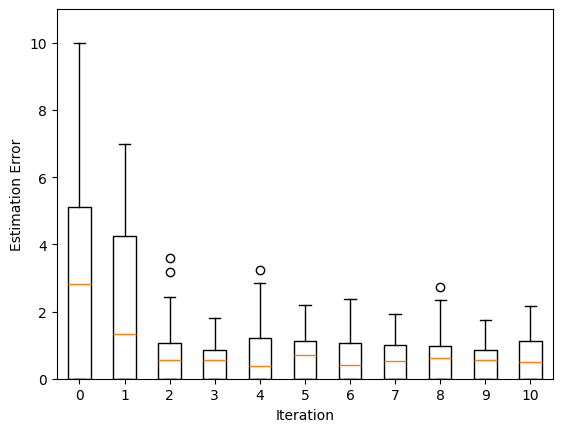

In [31]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 11)
plt.show()

In [28]:
np.median(estimation_error, axis=1)

array([2.82842712, 0.97561937, 0.62286735, 0.54662454, 0.49323936,
       0.51776342, 0.48630341, 0.41074772, 0.54349485, 0.55397083,
       0.45631076])

history

In [32]:
# Multilateration function using least squares
def multilaterate(neighbors):
    def error_function(x, neighbors):
        return sum((np.linalg.norm(x - np.array(neighbor[0])) - neighbor[1])**2 for neighbor in neighbors)
    
    if len(neighbors) < 3:
        return None, None  # Not enough neighbors to perform multilateration
    
    initial_guess = np.mean([neighbor[0] for neighbor in neighbors], axis=0)
    result = opt.minimize(error_function, initial_guess, args=(neighbors,))
    
    if result.success:
        estimation_accuracy = 1 - np.sqrt(result.fun / len(neighbors))/np.mean([neighbor[1] for neighbor in neighbors])  # Root Mean Squared Error / Average Distance
        return result.x, estimation_accuracy
    else:
        return None, None

In [33]:
import imageio
import copy

# prepare the lists
import random
random.seed(10)
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimate_location_list.append(truth_location_list[i])
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if truth_location_list[i][0] in [0,4,8] and truth_location_list[i][1] in [0,4,8]:
        estimated_accuracy_list.append(1)
    elif truth_location_list[i][0] in [2,6] and truth_location_list[i][1] in [2,6]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
# dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_6.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.3  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

# Initialize history data structure
neighbor_history = {i: {} for i in range(len(truth_location_list))}

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev* (distance**2))  # Add noise to the distance

                    # Update history data
                    if i not in neighbor_history[idx]:
                        neighbor_history[idx][i] = []
                    neighbor_history[idx][i].append(noisy_distance)

                    # Use history data to mitigate noise
                    if len(neighbor_history[idx][i]) > 1:
                        avg_noisy_distance = np.mean(neighbor_history[idx][i])
                        neighbor_list.append((estimate_location_list[i], avg_noisy_distance, estimated_accuracy_list_old[i]))
                    else:
                        neighbor_list.append((estimate_location_list[i], noisy_distance, estimated_accuracy_list_old[i]))

                    # neighbor_list.append([estimate_location_list[i], noisy_distance])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_6.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_distributed_6.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 6], [0, 4], [7, 0], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [5, 1], [2, 2], [3, 5], [2, 6], [0, 6], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [4, 5], [4, 4], [2, 7], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [4, 8], [6, 2], [5, 3], [6, 6], [5, 8], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [6, 3], [8, 4], [0, 0], [8, 8]]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2679988894.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2679988894.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2679988894.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_28816/2679988894.py:140: Depre

[[0, 0], [0.31821066391482566, 1.816177438371334], [0, 4], [-2.00243649394417, 6.264592126969262], [0, 8], [3, 7], [7, 4], [2, 0], [8, 7], [2.2784475224230567, -1.8203515968664994], [2, 2], [0.7309811679129284, 5.213698497335137], [2, 6], [1.7008995322606013, 7.925963360351149], [2, 5], [6, 6], [4, 4], [7, 2], [4, 0], [5.241126759876212, 3.402476391501669], [4, 4], [4.936336843540697, 6.0441309565385986], [4, 8], [3, 7], [6, 0], [0, 3], [2, 3], [7.039392569011611, 0.09080839689253993], [6, 2], [5.995756023203257, 4.162847514782184], [6, 6], [6.96894237615205, 10.27704506998579], [7, 6], [7, 1], [5, 8], [2, 3], [8, 0], [7.19147177755426, 1.861315383143299], [8, 4], [6.373487528351627, 5.058211672949677], [8, 8]]
[1, np.float64(0.9544580345942442), 1, np.float64(0.9563809470752239), 1, 0, 0, 0, 0, np.float64(0.9925473147191319), 1, np.float64(0.8174488444739902), 1, np.float64(0.6514767258700302), 0, 0, 0, 0, 1, np.float64(0.7940731411272228), 1, np.float64(0.7650051869726271), 1, 0, 0, 

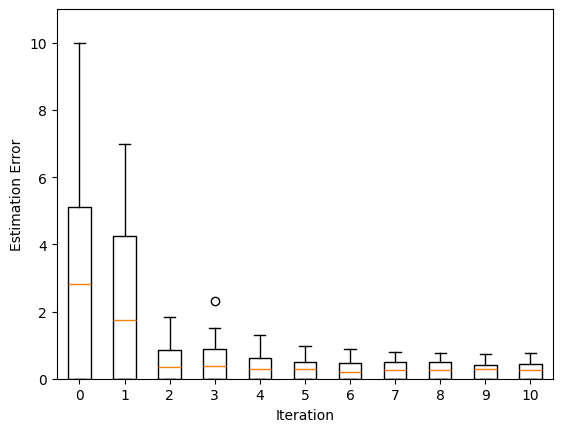

In [34]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 11)
plt.show()

In [35]:
np.median(estimation_error, axis=1)

array([2.82842712, 1.75598202, 0.34932796, 0.37205424, 0.27865896,
       0.27470896, 0.19569345, 0.2518478 , 0.26501828, 0.27620411,
       0.2469578 ])

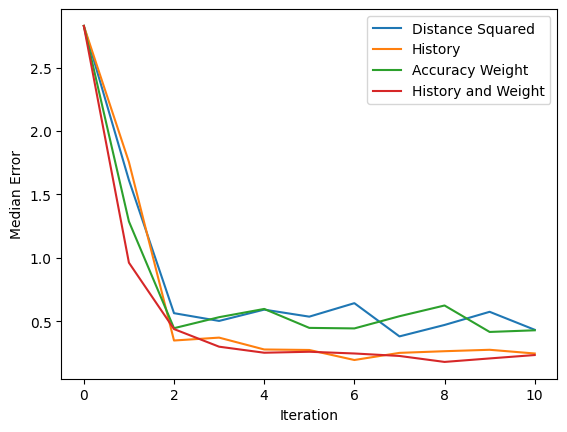

In [36]:
median_error_distance_squared = [2.82842712, 1.61319545, 0.56470453, 0.50362417, 0.59267969,
       0.53732375, 0.64355025, 0.38172344, 0.47189266, 0.57553652,
       0.43386637]
median_error_history = [2.82842712, 1.75598202, 0.34932796, 0.37205424, 0.27865896,
       0.27470896, 0.19569345, 0.2518478 , 0.26501828, 0.27620411,
       0.2469578 ]
median_error_accuracy_weight = [2.82842712, 1.2874744 , 0.44638791, 0.53309444, 0.5981137 ,
       0.44880453, 0.4445698 , 0.54064139, 0.62527333, 0.41676363,
       0.42976786]

median_error_history_weight = [2.82842712, 0.96263077, 0.43943012, 0.30060914, 0.25305327,
       0.26065347, 0.24707245, 0.22756331, 0.18056222, 0.20804992,
       0.23483994]

plt.plot(median_error_distance_squared, label='Distance Squared')
plt.plot(median_error_history, label='History')
plt.plot(median_error_accuracy_weight, label='Accuracy Weight')
plt.plot(median_error_history_weight, label='History and Weight')
plt.xlabel('Iteration')
plt.ylabel('Median Error')
plt.legend()
plt.show()